<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/multivariate-linear-regression/2D_function_expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using polynomial regression to model and reveal the force of gravity

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random


In [51]:
def test_func(x, y):
    return np.cos(x**2+y**2)

In [52]:
random.seed
with open('test_func_data.csv', mode='w') as sample_file:
    gravity_writer = csv.writer(sample_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    gravity_writer.writerow(['f(x,y)','x', 'y'])
    for i in range (0, 5000):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        gravity_writer.writerow([test_func(x, y), x, y])

In [53]:
df = pd.read_csv('/content/test_func_data.csv')
print(df)

        f(x,y)         x         y
0     0.953897 -0.108240 -0.541404
1     0.992298  0.332926  0.115555
2     0.459477 -0.930457  0.477117
3     0.996590 -0.271986 -0.092893
4     0.520304  0.794845 -0.625949
...        ...       ...       ...
4995  0.999974  0.056509 -0.063237
4996  0.776998 -0.795703 -0.218564
4997  0.294982 -0.773986 -0.819942
4998  0.238464 -0.776246 -0.852910
4999  0.151019  0.802652 -0.880311

[5000 rows x 3 columns]


In [54]:
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x^3']=df['x']**3
df['y^3']=df['y']**3
print(df)

        f(x,y)         x         y       x^2       y^2       x^3       y^3
0     0.953897 -0.108240 -0.541404  0.011716  0.293119 -0.001268 -0.158696
1     0.992298  0.332926  0.115555  0.110840  0.013353  0.036901  0.001543
2     0.459477 -0.930457  0.477117  0.865750  0.227640 -0.805543  0.108611
3     0.996590 -0.271986 -0.092893  0.073977  0.008629 -0.020121 -0.000802
4     0.520304  0.794845 -0.625949  0.631778  0.391812  0.502166 -0.245254
...        ...       ...       ...       ...       ...       ...       ...
4995  0.999974  0.056509 -0.063237  0.003193  0.003999  0.000180 -0.000253
4996  0.776998 -0.795703 -0.218564  0.633143  0.047770 -0.503793 -0.010441
4997  0.294982 -0.773986 -0.819942  0.599054  0.672306 -0.463659 -0.551252
4998  0.238464 -0.776246 -0.852910  0.602558  0.727455 -0.467733 -0.620453
4999  0.151019  0.802652 -0.880311  0.644250  0.774947  0.517109 -0.682194

[5000 rows x 7 columns]


Next, we scale the data

In [55]:
df_temp = df.to_numpy()
x = df_temp[:,1:7]
y = [df_temp[:,0]]
x = np.array(x)
print(x)
y = np.array(y)
y = y.T
#print(y)

[[-0.10824047 -0.54140446  0.011716    0.29311879 -0.00126815 -0.15869582]
 [ 0.3329261   0.11555479  0.11083979  0.01335291  0.03690146  0.00154299]
 [-0.93045686  0.47711659  0.86574998  0.22764024 -0.80554301  0.10861093]
 ...
 [-0.77398581 -0.81994242  0.59905403  0.67230556 -0.46365932 -0.55125185]
 [-0.77624602 -0.85290954  0.60255789  0.72745468 -0.46773317 -0.62045303]
 [ 0.80265213 -0.8803108   0.64425044  0.7749471   0.51710899 -0.6821943 ]]


In [56]:
def  computeCost(theta,X,y):
    m = float(len(y))
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [57]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = float(len(y))
    N=np.size(X,1)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,N))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

1.569539563309639
[[ 1.15081126]
 [-0.00210463]
 [-0.00389215]
 [-0.64199606]
 [-0.64741395]
 [ 0.00321737]
 [ 0.00644631]]
Final cost/MSE:  0.002


Text(0.5, 1.0, 'Cost function using Gradient Descent')

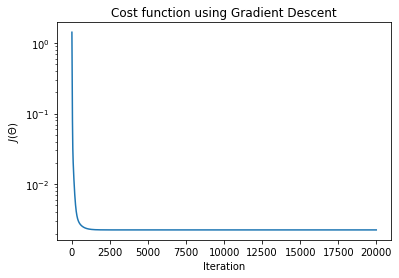

In [58]:
alpha =0.1
n_iter = 20000
N=np.size(x,1)
theta = np.random.randn(N+1,1)
#print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
#print(x_b)
print(computeCost(theta,x_b,y))

theta,cost_history,theta_history = gradient_descent(x_b,y,theta,alpha,n_iter)

print(theta)
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [59]:
df = pd.read_csv('/content/test_func_data.csv')
#print(df)

In [60]:
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x^4']=df['x']**4
df['y^4']=df['y']**4
df['x^2*y^2']=df['x']**2*df['y']**2
print(df)

        f(x,y)         x         y       x^2       y^2       x^4       y^4  \
0     0.953897 -0.108240 -0.541404  0.011716  0.293119  0.000137  0.085919   
1     0.992298  0.332926  0.115555  0.110840  0.013353  0.012285  0.000178   
2     0.459477 -0.930457  0.477117  0.865750  0.227640  0.749523  0.051820   
3     0.996590 -0.271986 -0.092893  0.073977  0.008629  0.005473  0.000074   
4     0.520304  0.794845 -0.625949  0.631778  0.391812  0.399144  0.153516   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.999974  0.056509 -0.063237  0.003193  0.003999  0.000010  0.000016   
4996  0.776998 -0.795703 -0.218564  0.633143  0.047770  0.400870  0.002282   
4997  0.294982 -0.773986 -0.819942  0.599054  0.672306  0.358866  0.451995   
4998  0.238464 -0.776246 -0.852910  0.602558  0.727455  0.363076  0.529190   
4999  0.151019  0.802652 -0.880311  0.644250  0.774947  0.415059  0.600543   

       x^2*y^2  
0     0.003434  
1     0.001480  
2     0.1970

In [61]:
df_temp = df.to_numpy()
x = df_temp[:,3:8]
y = [df_temp[:,0]]
x = np.array(x)
#print(x)
y = np.array(y)
y = y.T
#print(y)

0.23318456761085524
[[ 1.02158918]
 [-0.14446095]
 [-0.14153882]
 [-0.33481633]
 [-0.33948679]
 [-0.62605596]]
Final cost/MSE:  0.00007


Text(0.5, 1.0, 'Cost function using Gradient Descent')

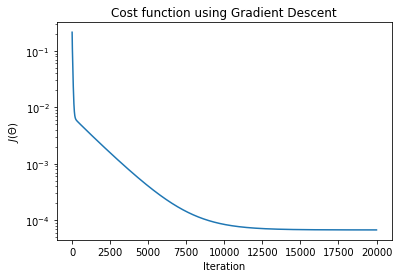

In [62]:
alpha =0.1
n_iter = 20000
N=np.size(x,1)
theta = np.random.randn(N+1,1)
#print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
#print(x_b)
print(computeCost(theta,x_b,y))

theta,cost_history,theta_history = gradient_descent(x_b,y,theta,alpha,n_iter)

print(theta)
print('Final cost/MSE:  {:0.5f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")